# Practica 2 IFN

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [72]:
df = pd.read_csv('Espectro triple alfa bueno(in).csv')
data = df.copy()
x = data['Channel']
y = data['Counts']

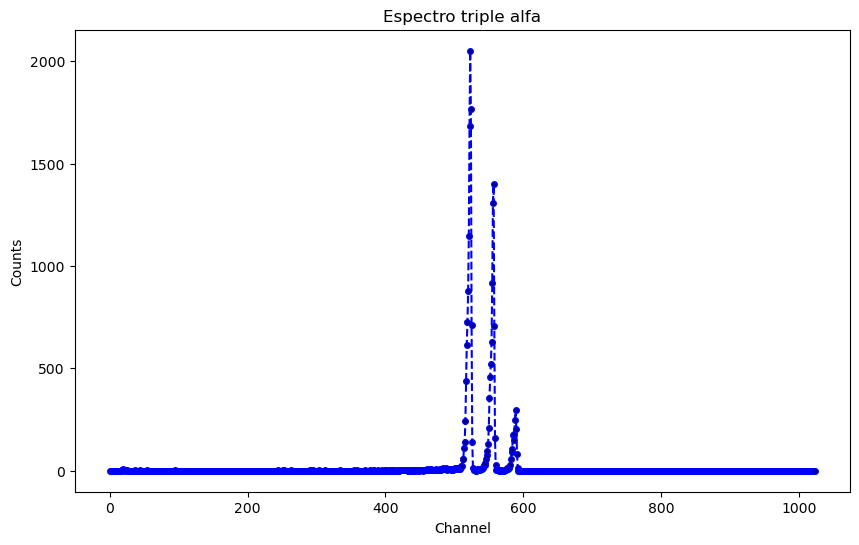

In [73]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y, 'bo--', ms=4, mfc='navy')
plt.title('Espectro triple alfa')
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.show()

ahora vemos que hay un acercamiento entre 400 a 610, por lo que vamos a acercarnos

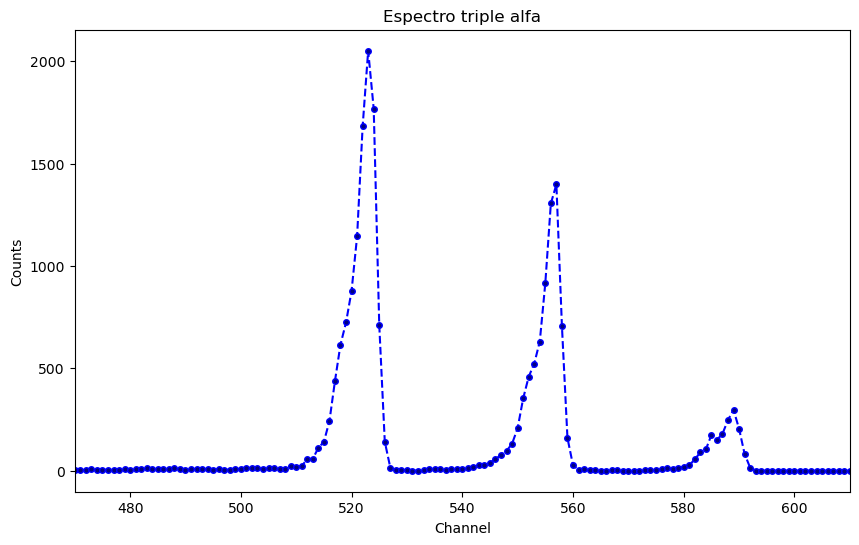

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y, 'bo--', ms=4, mfc='navy')
ax.set_xlim(470,610)
plt.title('Espectro triple alfa')
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.show()

y nos acercamos más...

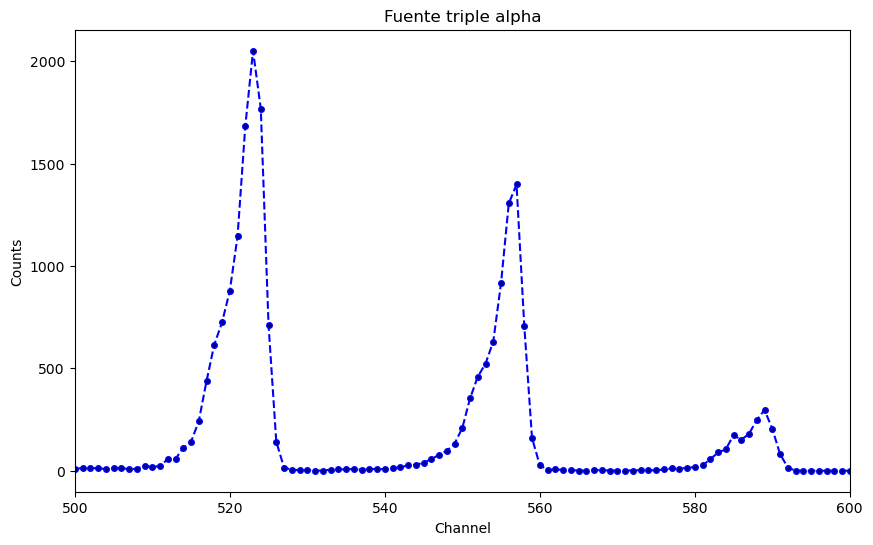

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y, 'bo--', ms=4, mfc='navy')
ax.set_xlim(500,600)
plt.title("Fuente triple alpha")
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.show()

Definimos la función gaussiana que utilizaremos para el ajuste

In [76]:
def gauss_f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

Definimos los valores para el plutanio 239

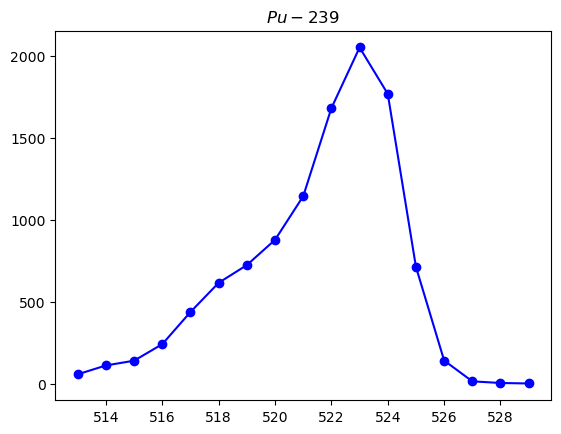

In [77]:
x_pu239 = x[(x>512) & (x<530)]
y_pu239 = y[(x>512) & (x<530)]
plt.plot(x_pu239,y_pu239,'bo-')
plt.title(r"$Pu-239$")
plt.show()

In [78]:
popt1, pcov1 = curve_fit(gauss_f, x_pu239, y_pu239, p0 = [2100, 523, 1])

# Mostramos los parámetros del ajuste 
print(f"Parámetros del ajuste: {popt1}")
print(f"Matriz de covarianza:\n {pcov1}")

Parámetros del ajuste: [1857.33554501  522.4378494     2.13129797]
Matriz de covarianza:
 [[ 2.62313062e+04 -1.41402072e-03 -2.00699923e+01]
 [-1.41402072e-03  4.60488771e-02  3.63389480e-06]
 [-2.00699923e+01  3.63389480e-06  4.60605377e-02]]


In [79]:
# Incertidumbre de los parámetros
err1 = np.sqrt(np.diag(pcov1))
print(f"Amplitud: {popt1[0]:.2f} +- {err1[0]:.2f}")
print(f"centroide: {popt1[1]:.2f} +- {err1[1]:.2f}")
print(f"sigma: {popt1[2]:.2f} +- {err1[2]:.2f}")

Amplitud: 1857.34 +- 161.96
centroide: 522.44 +- 0.21
sigma: 2.13 +- 0.21


Haremos lo mismo del Americio 

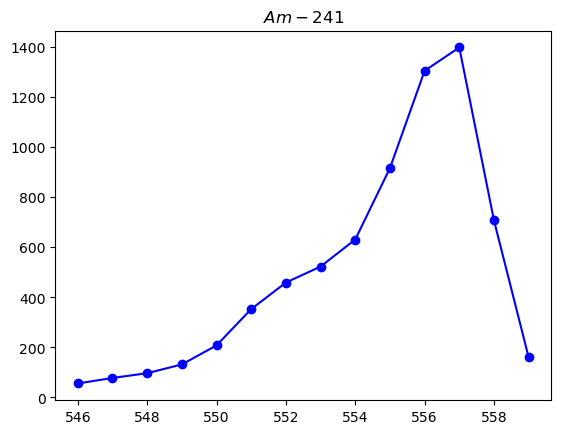

In [80]:
x_am241 = x[(x>545) & (x<560)]
y_am241 = y[(x>545) & (x<560)]
plt.plot(x_am241,y_am241,'bo-')
plt.title(r"$Am-241$")
plt.show()

In [81]:
popt2, pcov2 = curve_fit(gauss_f, x_am241, y_am241, p0 = [1450, 557, 1])

# Mostramos los parámetros del ajuste 
print(f"Parámetros del ajuste: {popt2}")
print(f"Matriz de covarianza:\n {pcov2}")

Parámetros del ajuste: [1218.19933237  555.91709654    2.16800182]
Matriz de covarianza:
 [[ 1.69382907e+04 -2.17930206e+00 -2.30508718e+01]
 [-2.17930206e+00  7.44784467e-02  1.09390191e-02]
 [-2.30508718e+01  1.09390191e-02  8.75328127e-02]]


In [82]:
# Incertidumbre de los parámetros
err2 = np.sqrt(np.diag(pcov2))
print(f"Amplitud: {popt2[0]:.2f} +- {err2[0]:.2f}")
print(f"centroide: {popt2[1]:.2f} +- {err2[1]:.2f}")
print(f"sigma: {popt2[2]:.2f} +- {err2[2]:.2f}")

Amplitud: 1218.20 +- 130.15
centroide: 555.92 +- 0.27
sigma: 2.17 +- 0.30


Por ultimo con el Curio 244.

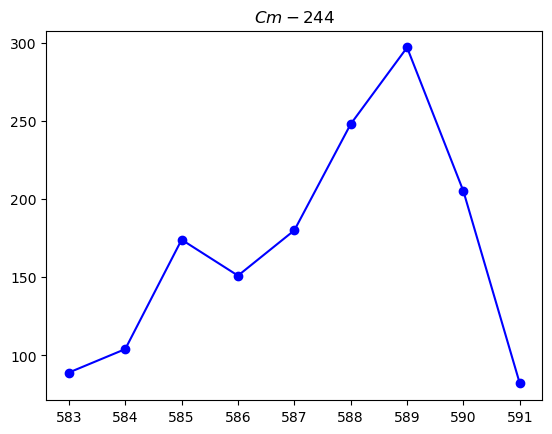

In [83]:
x_cm244 = x[(x>582) & (x<592)]
y_cm244 = y[(x>582) & (x<592)]
plt.plot(x_cm244,y_cm244,'bo-')
plt.title(r"$Cm-244$")
plt.show()

In [84]:
popt3, pcov3 = curve_fit(gauss_f, x_cm244, y_cm244, p0 = [350, 589, 1])

# Mostramos los parámetros del ajuste 
print(f"Parámetros del ajuste: {popt3}")
print(f"Matriz de covarianza:\n {pcov3}")

Parámetros del ajuste: [240.23898562 587.96059768   2.95632279]
Matriz de covarianza:
 [[ 8.14952392e+02 -1.84323467e+00 -1.02667669e+01]
 [-1.84323467e+00  2.12951578e-01  8.91832874e-02]
 [-1.02667669e+01  8.91832874e-02  3.30960085e-01]]


In [85]:
# Incertidumbre de los parámetros
err3 = np.sqrt(np.diag(pcov3))
print(f"Amplitud: {popt3[0]:.2f} +- {err3[0]:.2f}")
print(f"centroide: {popt3[1]:.2f} +- {err3[1]:.2f}")
print(f"sigma: {popt3[2]:.2f} +- {err3[2]:.2f}")

Amplitud: 240.24 +- 28.55
centroide: 587.96 +- 0.46
sigma: 2.96 +- 0.58


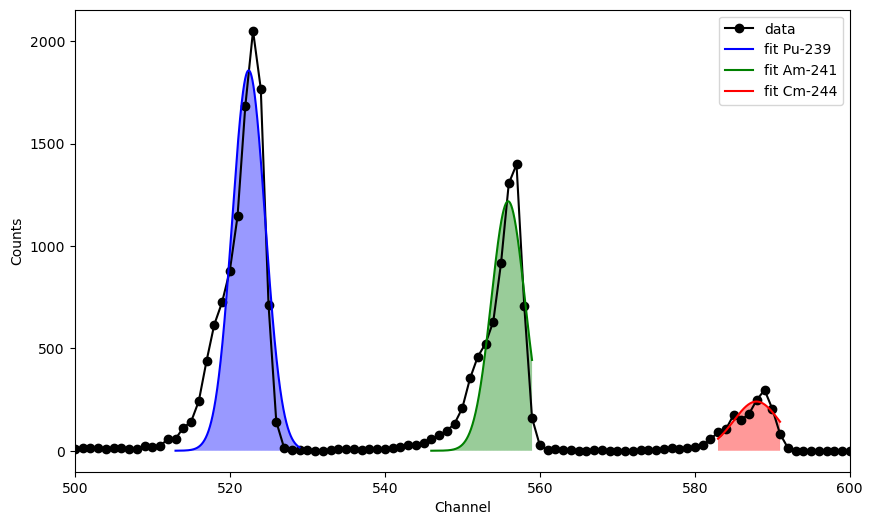

In [86]:
x_model_pu239 = np.linspace(min(x_pu239), max(x_pu239),1000)
x_model_am241 = np.linspace(min(x_am241), max(x_am241),1000)
x_model_cm244 = np.linspace(min(x_cm244), max(x_cm244),1000)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, 'ko-', label='data')
ax.plot(x_model_pu239, gauss_f(x_model_pu239,*popt1), 'b-', label='fit Pu-239')
ax.plot(x_model_am241, gauss_f(x_model_am241,*popt2), 'g-', label='fit Am-241')
ax.plot(x_model_cm244, gauss_f(x_model_cm244,*popt3), 'r-', label='fit Cm-244')
ax.fill_between(x_model_pu239, gauss_f(x_model_pu239,*popt1), 0, color="b", alpha=0.4, ls='--', lw=0.05)
ax.fill_between(x_model_am241, gauss_f(x_model_am241,*popt2), 0, color="g", alpha=0.4, ls='--', lw=0.05)
ax.fill_between(x_model_cm244, gauss_f(x_model_cm244,*popt3), 0, color="r", alpha=0.4, ls='--', lw=0.05)
ax.set_xlim(500,600)
plt.xlabel(r'Channel')
plt.ylabel(r'Counts')
plt.legend()
plt.show()

Ahora toca hacer el ajuste lineal pero vaya, los datos no quedaron .-.

In [87]:
def linear(x,m,n):
    return m * x + n

In [88]:
popt_l, pcov_l = curve_fit(linear, mean_channel, energy, p0 = [1,1])
print(popt_l)
print(mean_channel, " ", energy)

NameError: name 'mean_channel' is not defined